In [1]:
# Cell 1: Imports and Configuration
import os
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import neurokit2 as nk

# --- Configuration ---
RECORD_NAME = '100'
DATABASE_NAME = 'mitdb'
PROJECT_DATA_DIR = 'data'

print("Libraries imported and configuration set.")

Matplotlib is building the font cache; this may take a moment.


Libraries imported and configuration set.


In [2]:
# Cell 2: Load ECG Data from PhysioNet
print(f"Fetching record '{RECORD_NAME}' from PhysioNet database '{DATABASE_NAME}'...")

# Load the record signals and metadata
record = wfdb.rdrecord(RECORD_NAME, pn_dir=DATABASE_NAME)
# Load the annotations
annotation = wfdb.rdann(RECORD_NAME, 'atr', pn_dir=DATABASE_NAME)

print("✅ Record and annotations loaded successfully.")
print(f"   - Sampling Frequency: {record.fs} Hz")
print(f"   - Signal Shape: {record.p_signal.shape}")

Fetching record '100' from PhysioNet database 'mitdb'...
✅ Record and annotations loaded successfully.
   - Sampling Frequency: 360 Hz
   - Signal Shape: (650000, 2)


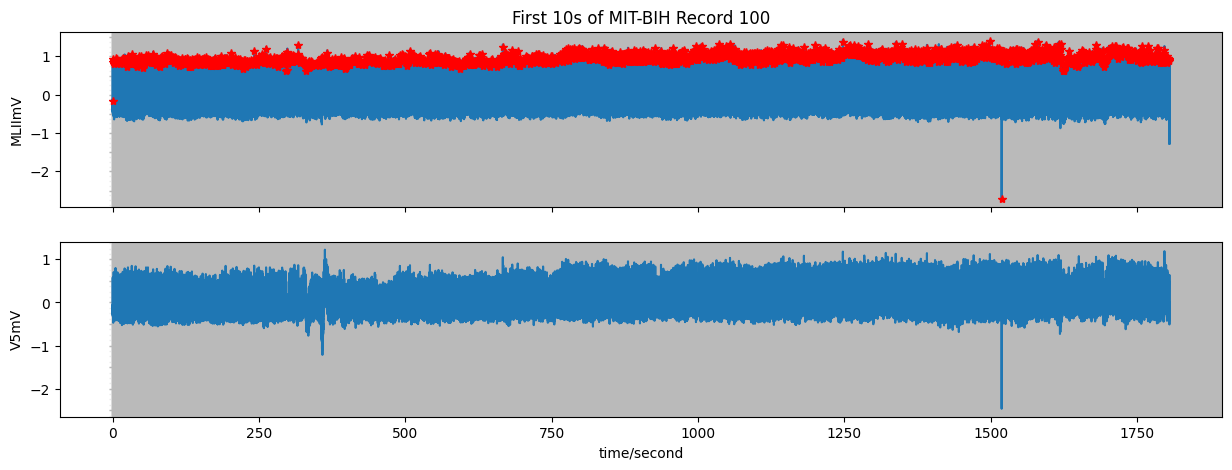

In [3]:
# Cell 3: Quick Visualization with wfdb
# Use wfd
# b's plotting utility for an overview of the first 10 seconds
wfdb.plot_wfdb(record=record, annotation=annotation, title=f'First 10s of MIT-BIH Record {RECORD_NAME}',
              time_units='seconds', figsize=(15, 5), ecg_grids='all')
plt.show() # Use plt.show() to display the plot

In [4]:
# Cell 4: Preprocess with NeuroKit2
# Extract the first signal channel
signal = record.p_signal[:, 0]
fs = record.fs

# Clean the signal and find R-peaks
ecg_cleaned = nk.ecg_clean(signal, sampling_rate=fs)
signals, info = nk.ecg_process(ecg_cleaned, sampling_rate=fs)

print(f"✅ ECG processed. Found {len(info['ECG_R_Peaks'])} R-peaks.")

✅ ECG processed. Found 2271 R-peaks.


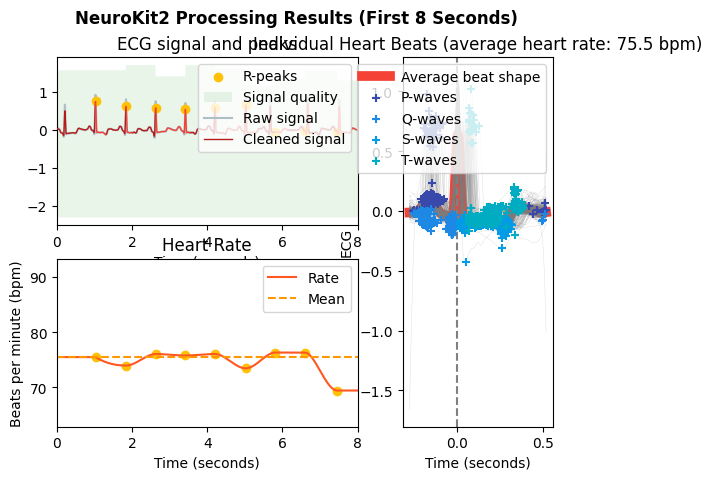

In [13]:
# Cell 5: Visualize the Processed Signal (Final Corrected Version)

# 1. Call the plotting function with the correct name: ecg_plot
#    It will draw on the "current" figure.
nk.ecg_plot(signals, info)

# 2. After the plot is drawn, get a handle to the current figure (`gcf`)
#    and then get a list of all its subplots/axes.
fig = plt.gcf()
axes = fig.get_axes()

# 3. Now that we have the list of axes, we can reliably set the x-limit
#    on the first two subplots (the ECG signal and Heart Rate plots).
axes[0].set_xlim(0, 8)
axes[1].set_xlim(0, 8)

# 4. Add the title and show the correctly zoomed-in plot.
plt.suptitle("NeuroKit2 Processing Results (First 8 Seconds)", weight='bold')
plt.show()

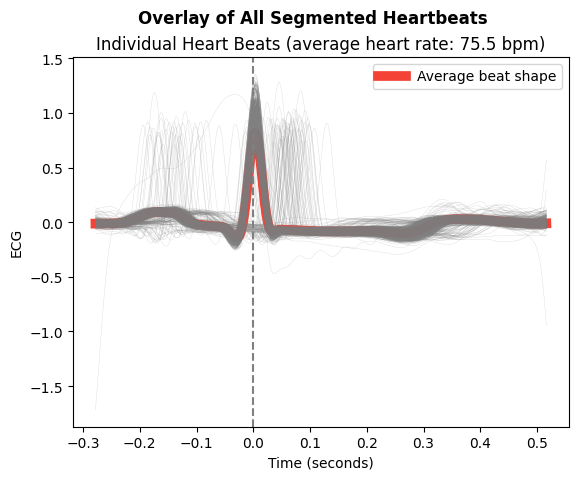

✅ Signal segmented into 2271 heartbeats.


In [14]:
# Cell 6: Segment into Heartbeats
rpeaks = info["ECG_R_Peaks"]
beats = nk.ecg_segment(ecg_cleaned, rpeaks, sampling_rate=fs, show=True)
plt.suptitle("Overlay of All Segmented Heartbeats", weight='bold')
plt.show()

print(f"✅ Signal segmented into {len(beats)} heartbeats.")

In [15]:
# Cell 7: Save the Segmented Beats (Final Deliverable)
output_dir = os.path.join(PROJECT_DATA_DIR, f"patient_{RECORD_NAME}", "beats")
os.makedirs(output_dir, exist_ok=True)
print(f"Saving beats to directory: '{output_dir}'")

num_beats_saved = 0
for beat_index, beat_data in beats.items():
    beat_signal = beat_data['Signal'].values
    filename = os.path.join(output_dir, f"beat_{int(beat_index):04d}.npy")
    np.save(filename, beat_signal)
    num_beats_saved += 1
    
print(f"✅ Successfully saved {num_beats_saved} beats.")
print("\n🎉 STEP 1 COMPLETE! 🎉")

Saving beats to directory: 'data\patient_100\beats'
✅ Successfully saved 2271 beats.

🎉 STEP 1 COMPLETE! 🎉
